In [1]:
# Import standard libraries for analytics, machine learning and visualization. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Import library for warning handling and ignore warning notifications
import warnings
warnings.filterwarnings('ignore')

# Run magic function so that plots will render in current cell/window and not as standard pop-out window
%matplotlib inline

In [2]:
# Lets read our data first then load into data frames so we can take a look at the data.

train_data   = pd.read_csv('./data/train.csv')
test_data    = pd.read_csv('./data/test.csv')

train_df   = pd.DataFrame(train_data)
test_df    = pd.DataFrame(test_data)


In [3]:
# View first 5 rows along with column headers.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# edit column headers to lowercase as its easier for me to type them out throughout my workflow.

train_df.columns = train_df.columns.str.lower()
train_df.head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# The dataframe has included default indices (shown in bold) for the records or rows in the dataset. Passengerid seems like
# a reasonable index for our rows so lets go ahead and set them as our indices by naming the passengerid column as the index
# column in the dataframe constructor.

train_df = train_df.set_index('passengerid')

In [6]:
train_df.head(0)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,


In [7]:
# Take a look at the dataframe info to inspect dtypes are correct
# and inspect the column counts for missing data.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


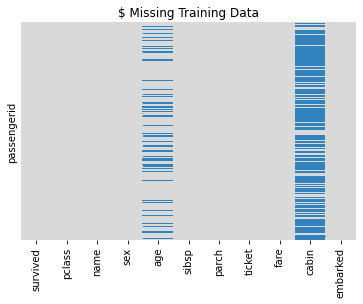

In [8]:
# Plot heatmap to get a visual sense of the missing data. It shows entries where there are null
# or missing values as a blue line and entries where there are values as a gray line. 
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('$ Missing Training Data')
plt.show()

A considerable amount of both age and cabin data is missing. I suspect age will be a relatively important variable in the outcomes of survival and therefor its prediction. Following from that, it's relevant to try and correct these imbalances while preserving the behavior of the data. So to help with this I will try to infer ages for the passengers who dont have one listed by looking at the distribution of the age data against passenger socioeconomic class.

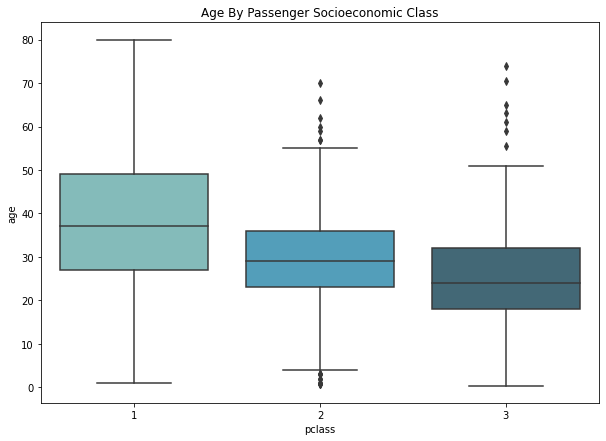

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x='pclass', y='age', data=train_df, palette='GnBu_d').set_title('Age By Passenger Socioeconomic Class')
plt.show()

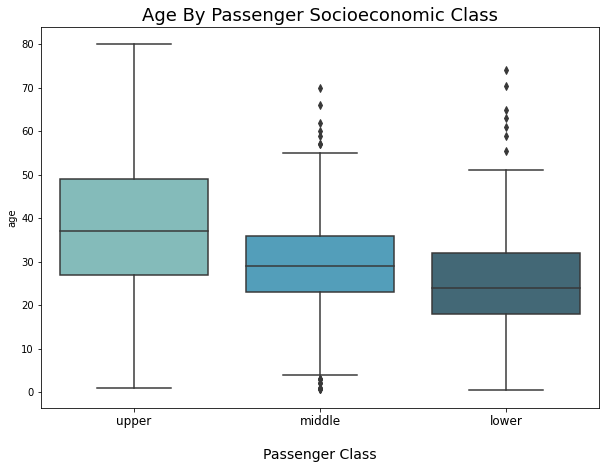

In [10]:
# the class labels are 1,2, and 3 and correspond to upper, middle and lower. Rather than change
# the data in the dataset I'll just change their labels in the plotting functions.

plt.figure(figsize=(10,7))
sns.boxplot(x='pclass', y='age', data=train_df, palette='GnBu_d')

plt.title('Age By Passenger Socioeconomic Class', fontsize=18)
plt.xticks(ticks=[0,1,2], labels=['upper', 'middle', 'lower'], fontsize=12)
plt.xlabel('\nPassenger Class', fontsize=14)

plt.show()

We can see from the boxplots that the age data is normally distributed across each respective class therefor its reasonable to choose the mean age of each passenger class as a measure of central tendency. This means we can use the mean ages for each class and impute them for the missing age data using their pclass values since that column is complete and not missing data. Thanks sklearn!


In [11]:
# Take a look at the dataframe columns so that i know which header is in which 
# position (recall that python lists are indexed at 0)

train_df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [12]:
print('the upper class mean age is '  + str(np.mean(train_df.age[train_df.pclass==1])))
print('the middle class mean age is ' + str(np.mean(train_df.age[train_df.pclass==2])))
print('the lower class mean age is '  + str(np.mean(train_df.age[train_df.pclass==3])))

the upper class mean age is 38.233440860215055
the middle class mean age is 29.87763005780347
the lower class mean age is 25.14061971830986


In [13]:
# Lets write an imputation function to do this for us.

def impute_age(cols):
    age = cols[4]
    pclass = cols[2]
    
    #for entries with a null age value, impute mean class age based on which class they are.
    if pd.isnull(age):
        if pclass == 1:
            return 38
        
        elif pclass == 2:
            return 30
        
        else:
            return 24

In [14]:
# The cabin feature is very sparse so it is dropped inplace (permanently removed).
train_df.drop('cabin', axis=1, inplace=True)

<AxesSubplot:ylabel='passengerid'>

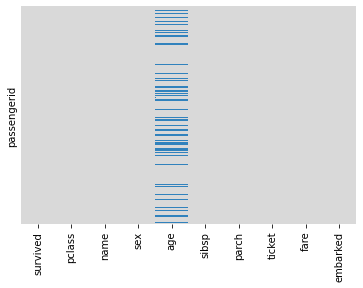

In [15]:
# Missing data heatmap
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')

Taking a look at the heatmap again, we see some improvement after imputation but there are still


In [16]:
# Remove rows with missing data, which in this case is only in the age column.
train_df.dropna(inplace=True)

<AxesSubplot:ylabel='passengerid'>

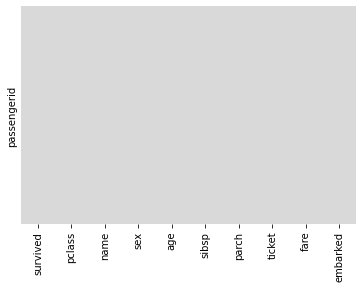

In [17]:
# Check data heatmap one last time.
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')

Our dataset is now filled and there are no missing values. 

In [18]:
# Data types
print(train_df.info())

# Identify non-null objects
print('\n')
print('Non-Null Objects to Be Converted to Category')
print(train_df.select_dtypes(['object']).columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   name      712 non-null    object 
 3   sex       712 non-null    object 
 4   age       712 non-null    float64
 5   sibsp     712 non-null    int64  
 6   parch     712 non-null    int64  
 7   ticket    712 non-null    object 
 8   fare      712 non-null    float64
 9   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB
None


Non-Null Objects to Be Converted to Category
Index(['name', 'sex', 'ticket', 'embarked'], dtype='object')


Taking a look at the data dictionary, we can see more detail about the context of the data. The columns for name and ticket aren't relevant for the model and will be removed.

![](data/data_dictionary.png)

It looks like the sex and embarked columns can be number encoded so that the model can be able to utilized them in making predictions.

In [19]:
# Remove unnecessary columns  
train_df.drop(['name','ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['sex','embarked']

for colname in objcat:
    train_df[colname] = train_df[colname].astype('category')

In [21]:
# Numeric summary
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.0,1.0000
pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.0,3.0000
age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.0,80.0000
sibsp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.0,5.0000
parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.0,6.0000
fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.0,512.3292


Target Variable
survived
0    424
1    288
Name: survived, dtype: int64


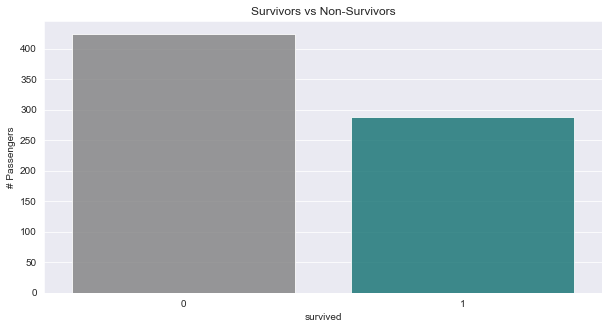

In [28]:
# Survival Count
print('Target Variable')
print(train_df.groupby(['survived']).survived.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(train_df['survived'], alpha =.80, palette= ['grey','teal'])
plt.title('Survivors vs Non-Survivors')
plt.ylabel('# Passengers')
plt.show()

Continuous Variables
      count       mean        std   min    25%       50%   75%       max
age   712.0  29.642093  14.492933  0.42  20.00  28.00000  38.0   80.0000
fare  712.0  34.567251  52.938648  0.00   8.05  15.64585  33.0  512.3292
--------------------------------------------------------------------------------
Discrete Variables
pclass
1    184
2    173
3    355
Name: pclass, dtype: int64
sibsp
0    469
1    183
2     25
3     12
4     18
5      5
Name: sibsp, dtype: int64
parch
0    519
1    110
2     68
3      5
4      4
5      5
6      1
Name: parch, dtype: int64


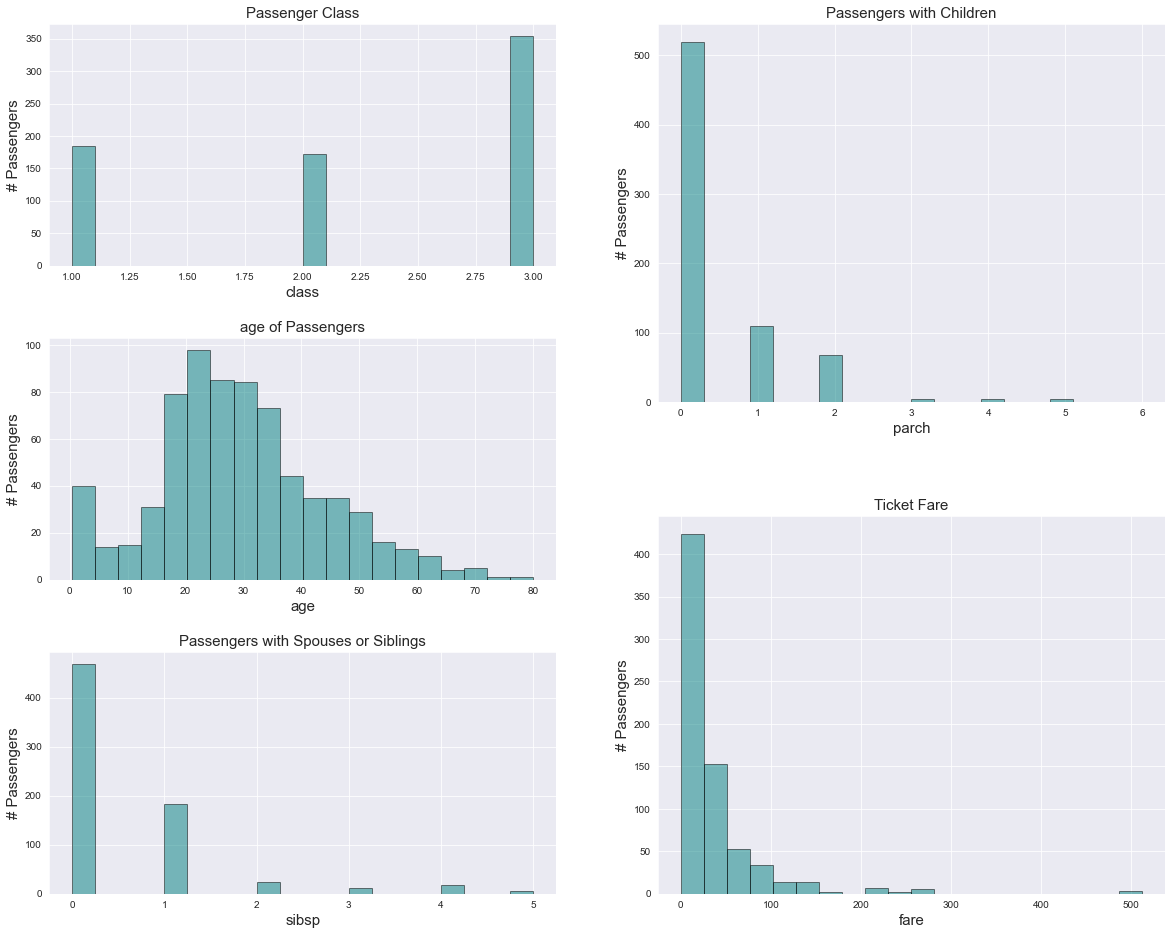

In [31]:
# Identify numeric features
print('Continuous Variables')
print(train_df[['age','fare']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(train_df.groupby('pclass').pclass.count())
print(train_df.groupby('sibsp').sibsp.count())
print(train_df.groupby('parch').parch.count())

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(train_df['pclass'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('class', fontsize = 15)
ax1.set_ylabel('# Passengers',fontsize = 15)
ax1.set_title('Passenger Class',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(train_df['age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('age',fontsize = 15)
ax2.set_ylabel('# Passengers',fontsize = 15)
ax2.set_title('age of Passengers',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(train_df['sibsp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('sibsp',fontsize = 15)
ax3.set_ylabel('# Passengers',fontsize = 15)
ax3.set_title('Passengers with Spouses or Siblings',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(train_df['parch'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('parch',fontsize = 15)
ax4.set_ylabel('# Passengers',fontsize = 15)
ax4.set_title('Passengers with Children',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(train_df['fare'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('fare',fontsize = 15)
ax5.set_ylabel('# Passengers',fontsize = 15)
ax5.set_title('Ticket Fare',fontsize = 15)

plt.show()

Passenger Class Summary


survived    0    1
pclass            
1          64  120
2          90   83
3         270   85


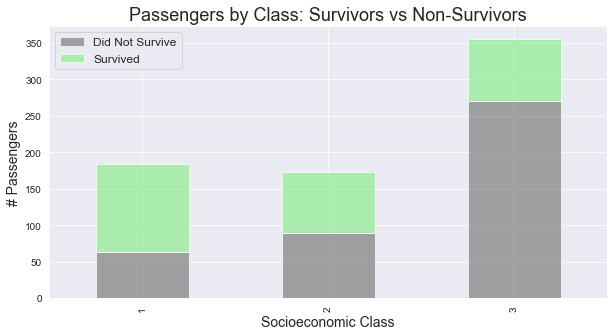

In [44]:
# Passenger class summary
print('Passenger Class Summary')

print('\n')
print(train_df.groupby(['pclass','survived']).pclass.count().unstack())

# Passenger class visualization
p_class = train_df.groupby(['pclass','survived']).pclass.count().unstack()
p1 = p_class.plot(figsize=(10,5), kind = 'bar', stacked = True, 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Socioeconomic Class', fontsize=14)
p1.set_ylabel('# Passengers', fontsize=14)
p1.set_title('Passengers by Class: Survivors vs Non-Survivors',fontsize=18)
p1.legend(['Did Not Survive','Survived'],fontsize=12)
plt.show()